In [1]:
from __future__ import print_function

%matplotlib inline
%load_ext autoreload
%autoreload 2

import glob
import os
import numpy as np
import importlib_resources
import pathlib
import shutil

# Load nuPyProp data & models modules
from nupyprop import data
from nupyprop import models

# Load astropy modules
from astropy.table import Table
from astropy.io import ascii

# Plotting modules
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sns

sns.set_theme()
sns.set_context("paper")
sns.set_style("white", {"font.family": "STIXGeneral"})

# Plotting defaults
mpl.rcParams['xtick.labelsize'] = 26
mpl.rcParams['ytick.labelsize'] = 26
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['legend.fontsize'] = 23
plt.rcParams['legend.title_fontsize'] = 23
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['axes.titlesize'] = 30
mpl.rcParams['figure.titlesize'] = 30
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.linewidth'] = 2

# List of default neutrino cross-section models provided with nuPyProp

In [2]:
nu_models = ['allm', 'bdhm', 'ct18nlo', 'nct15']

# See external neutrino cross-section (& cross-section CDF) model files in the model directory

In [3]:
models_path = str(pathlib.Path(models.__file__).resolve().parent) # directory where the external model files exist

xc_files = glob.glob(models_path + '/xc_*.ecsv')
xc_files = [os.path.basename(file) for file in xc_files]
nu_xc_files = [i for i in xc_files if 'neutrino' in i]

ixc_files = glob.glob(models_path + '/ixc_*.ecsv')
ixc_files = [os.path.basename(file) for file in ixc_files]
nu_ixc_files = [i for i in ixc_files if 'neutrino' in i]

for file in nu_xc_files + nu_ixc_files:
    print(file)

xc_neutrino_ctw.ecsv
xc_anti_neutrino_ctw.ecsv
ixc_neutrino_ctw.ecsv
ixc_anti_neutrino_ctw.ecsv


# Set global parameter values

In [4]:
part_type = 'nu' # nu for neutrino
model = 'ctw' # 'ctw' is an example of external neutrino cross-section model provided in nuPyProp
nu_type = 'neutrino' # neutrino or anti-neutrino

# Write sample external neutrino cross-section model files to current directory

In [5]:
data.get_xc(part_type, model, nu_type, out=True) # to get cross-section file
data.get_ixc(part_type, model, nu_type, out=True) # to get cross-section CDF file

neutrino cross-section data saved to file xc_neutrino_ctw.ecsv
neutrino cross-section CDF data saved to file ixc_neutrino_ctw.ecsv


## Note that if you want to create your own custom cross-section model, you will have to create ecsv files (atleast for cross-section and cross-section CDF values individually), which are astropy friendly (the details of which you can see in the following sections) and the files need to be present in the path specified in the variable _models_path_ 

# Now that the files are saved to your present working directory, let's try to read the files & plot them

## Reading a cross-section table

In [6]:
xc_table = Table.read('xc_neutrino_ctw.ecsv', format='ascii.ecsv')

for key in xc_table.meta:
    print(key, ':', xc_table.meta[key],"\n")
    
print(xc_table)

Description : Neutrino-nucleon cross-section values for CTW 

energy : Neutrino energy, in GeV 

sigma_cc_ctw : Charged current cross-section for CTW, in cm^2 

sigma_nc_ctw : Neutral current cross-section for CTW, in cm^2 

      energy            sigma_cc_ctw           sigma_nc_ctw     
------------------ ---------------------- ----------------------
            1000.0  5.938363384193696e-36 1.8316238118834595e-36
1258.9254117941675  7.614325777036462e-36  2.374978759723747e-36
 1584.893192461114   9.66022781835215e-36  3.045340038994374e-36
1995.2623149688789  1.213644724945214e-35  3.864903710066387e-36
  2511.88643150958  1.511003553575395e-35  4.858535110351242e-36
3162.2776601683795 1.8655167865678622e-35  6.053965738164019e-36
3981.0717055349733 2.2853618117243375e-35   7.48200045403269e-36
 5011.872336272725 2.7795261130116825e-35  9.176735977666657e-36
  6309.57344480193 3.3578604576872297e-35 1.1175791664654339e-35
 7943.282347242814  4.031135269118463e-35 1.3520553551236002

# Plotting the cross-section model values

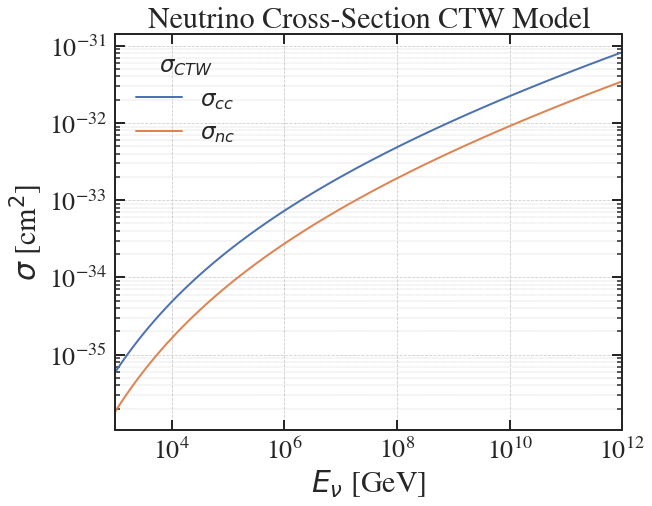

In [7]:
E_nu = data.E_nu # binned neutrino energy values, in GeV

ctw_cc = data.get_xc(part_type, model, nu_type).T[0]
ctw_nc = data.get_xc(part_type, model, nu_type).T[1]

fig, axs = plt.subplots(1, figsize=(10/1.1, 8/1.1))

axs.loglog(E_nu, ctw_cc, label = r'$\sigma_{cc}$')
axs.loglog(E_nu, ctw_nc, label = r'$\sigma_{nc}$')

axs.legend(loc='best',ncol=1, title = r'$\sigma_{CTW}$')
axs.grid(which='major', axis='both', linestyle='--')
axs.grid(which='minor', axis='both', linestyle=':', linewidth='0.2', color='black')
axs.xaxis.set_ticks_position('both')
axs.yaxis.set_ticks_position('both')
axs.set_xlim(1e3,1e12)
axs.set_xlabel(r'$E_{\nu}$ [GeV]')
axs.set_ylabel(r'$\sigma$ [cm$^2$]')
axs.set_title('Neutrino Cross-Section CTW Model')
plt.show()

## Reading cross-section CDF table

In [8]:
ixc_table = Table.read('ixc_neutrino_ctw.ecsv', format='ascii.ecsv')

for key in ixc_table.meta:
    print(key, ':', ixc_table.meta[key],"\n")
    
print(ixc_table)

Description : Neutrino-nucleon cross-section CDF values for CTW 

energy : Neutrino energy, in GeV 

y : Inelasticity; y = (E_initial-E_final)/E_initial 

cc_cdf_ctw : Charged current cross-section CDF values for CTW 

nc_cdf_ctw : Neutral current cross-section CDF values for CTW 

     energy               y                cc_cdf_ctw          nc_cdf_ctw    
--------------- --------------------- ------------------- -------------------
         1000.0                   0.0                 0.0                 0.0
         1000.0    0.7943282347242815  0.1141435980504456 0.11006960208603378
         1000.0    0.6309573444801932 0.22184065221927995 0.21449654939232565
         1000.0    0.5011872336272722  0.3223906050216212 0.31259426340347873
         1000.0    0.3981071705534972 0.41518986782386147  0.4037394432860496
         1000.0   0.31622776601683794  0.4997825455580237  0.4874204622121243
         1000.0     0.251188643150958  0.5759030138707044  0.5632825833353448
         1000.0

# Optional: Plot all neutrino & anti-neutrino cross-section models available in nuPyProp

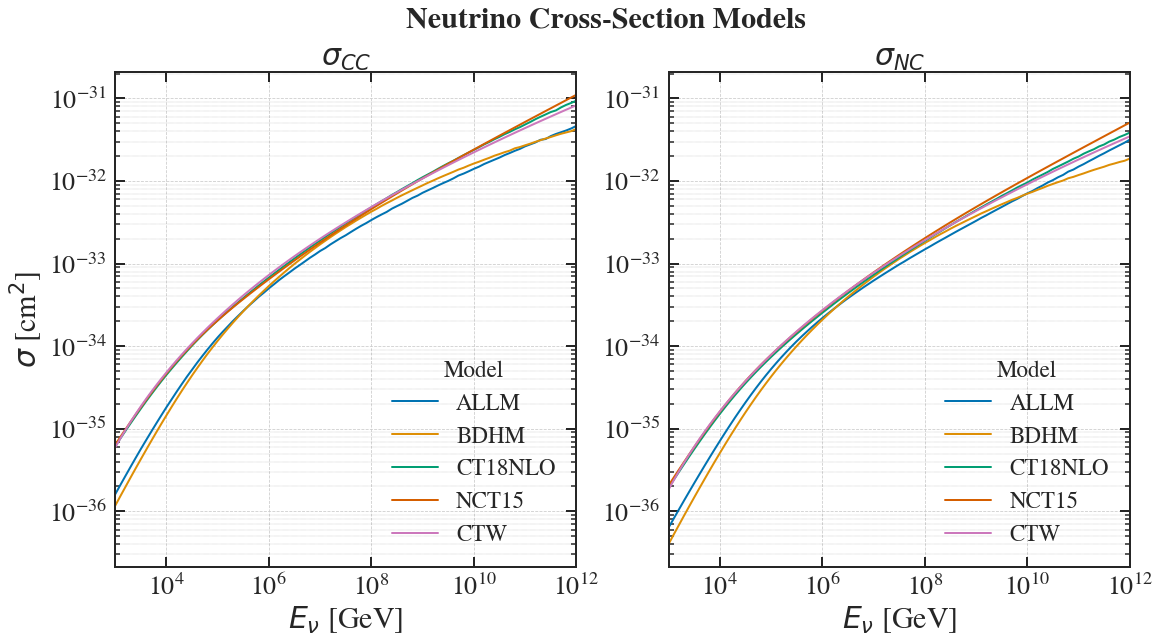

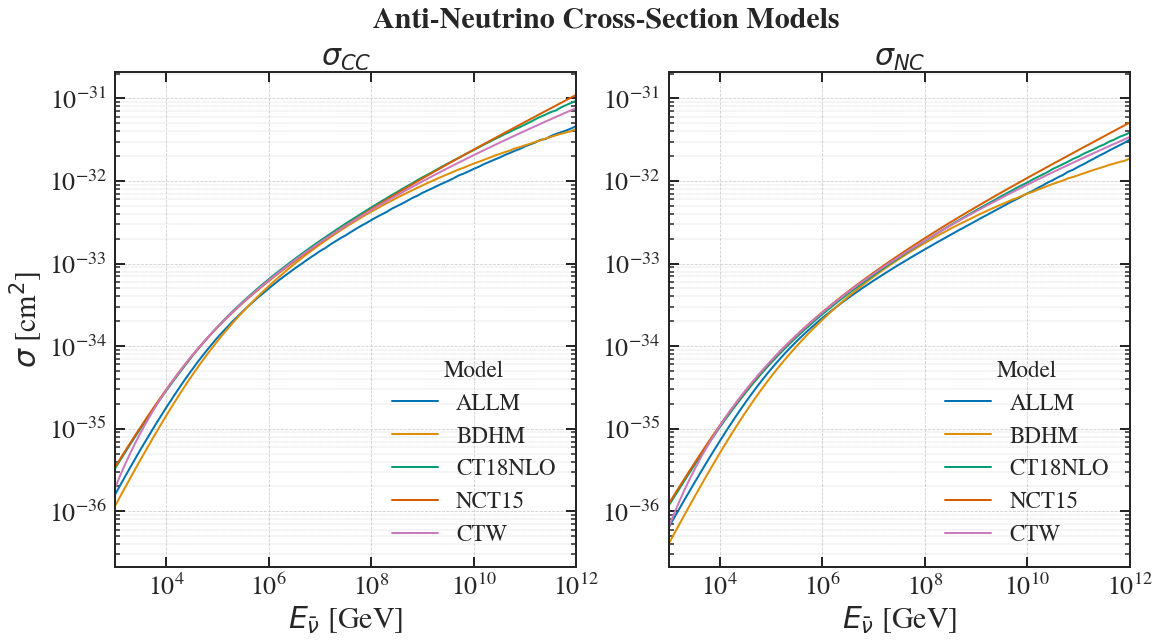

In [9]:
nu_models = ['allm', 'bdhm', 'ct18nlo', 'nct15', 'ctw']
E_nu = data.E_nu # binned neutrino energy values, in GeV
color_map = cycle(sns.color_palette("colorblind"))

fig_nu, axs_nu = plt.subplots(1,2, figsize=(20/1.1, 10/1.1), sharey=True) # create 2 subplots for neutrino CC & NC cross-sections
fig_anu, axs_anu = plt.subplots(1,2, figsize=(20/1.1, 10/1.1), sharey=True) # create 2 subplots for anti-neutrino CC & NC cross-sections

axs_lst = [axs_nu[0], axs_nu[1], axs_anu[0], axs_anu[1]]
axs_single = [axs_nu, axs_anu]

for model in nu_models:
    color = next(color_map)
    cc_nu = data.get_xc(part_type, model, 'neutrino').T[0]
    nc_nu = data.get_xc(part_type, model, 'neutrino').T[1]
    
    axs_nu[0].loglog(E_nu, cc_nu, color=color, label = '%s' % model.upper())
    axs_nu[1].loglog(E_nu, nc_nu, color=color, label = '%s' % model.upper())
    
    cc_anu = data.get_xc(part_type, model, 'anti_neutrino').T[0]
    nc_anu = data.get_xc(part_type, model, 'anti_neutrino').T[1]
    
    axs_anu[0].loglog(E_nu, cc_anu, color=color, label = '%s' % model.upper())
    axs_anu[1].loglog(E_nu, nc_anu, color=color, label = '%s' % model.upper())
    
for axs in axs_lst:
    axs.legend(loc='best',ncol=1, title = "Model")
    axs.grid(which='major', axis='both', linestyle='--')
    axs.grid(which='minor', axis='both', linestyle=':', linewidth='0.2', color='black')
    axs.xaxis.set_ticks_position('both')
    axs.yaxis.set_ticks_position('both')
    axs.tick_params(axis='x', which='both', labelbottom = True, labeltop = False)
    axs.tick_params(axis='y', which='both', left = True, labelleft = True, labelright= False)
    axs.set_xlim(1e3,1e12)
    if axs == axs_nu[0] or axs == axs_nu[1]:axs.set_xlabel(r'$E_{\nu}$ [GeV]') # neutrino plots
    else:axs.set_xlabel(r'$E_{\bar\nu}$ [GeV]') # anti-neutrino plots
    
axs_nu[0].set_ylabel(r'$\sigma$ [cm$^2$]')
axs_nu[0].set_title(r'$\sigma_{CC}$')
axs_nu[1].set_title(r'$\sigma_{NC}$')
fig_nu.suptitle('Neutrino Cross-Section Models',fontweight ="bold")

axs_anu[0].set_ylabel(r'$\sigma$ [cm$^2$]')
axs_anu[0].set_title(r'$\sigma_{CC}$')
axs_anu[1].set_title(r'$\sigma_{NC}$')
fig_anu.suptitle('Anti-Neutrino Cross-Section Models',fontweight ="bold")  
plt.show()

# Optional: Remove ecsv files from current working directory

In [10]:
ecsv_files = glob.glob('*.ecsv')
for file in ecsv_files:
    os.remove(file)